In [1]:
import os
path = os.path.abspath(os.path.join('..'))
print(path)
import sys
sys.path.insert(0,path)
print(sys.executable)
from dcapy.weiner import Weiner
import numpy as np 
import pandas as pd
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats

/home/scuervo/Documents/dev/dcapy
/home/scuervo/anaconda3/envs/res/bin/python


<AxesSubplot:>

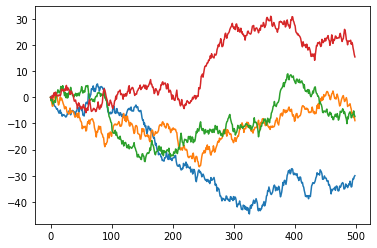

In [2]:
x = Weiner()

df = x.brownian_motion(500,4)
#dfa = x.brownian_motion(5000,3,interval=0.6)
fig, ax = plt.subplots()
df.plot(ax=ax,legend=False)
#dfa.plot(ax=ax)

<AxesSubplot:>

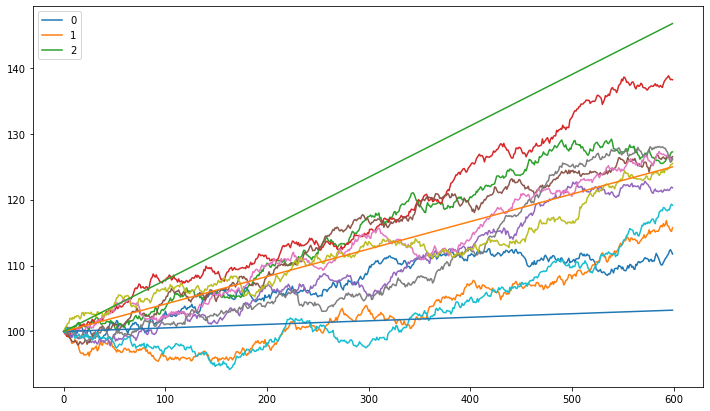

In [18]:
x1 = Weiner(initial_condition=100,generator=stats.norm, mu=0.5, kw_generator={'scale':1},freq_mu='A')

fig,ax = plt.subplots(figsize=(12,7))
df1 = x1.brownian_motion(50*12,10, freq='M')
df1.plot(ax=ax,legend=False)
df1a = x1.brownian_motion(50*12,3, freq='M',interval=0.1)
df1a.plot(ax=ax)

<AxesSubplot:>

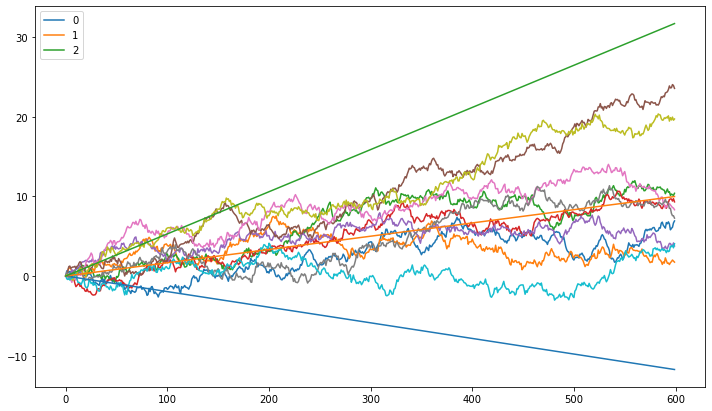

In [4]:
x2 = Weiner(initial_condition=0,generator=stats.norm, mu=0.2/12, kw_generator={'scale':0.2887},freq_mu='M', seed=910821)

fig,ax = plt.subplots(figsize=(12,7))
df2 = x2.brownian_motion(50*12,10, freq='M')
df2.plot(ax=ax,legend=False)
df2a = x2.brownian_motion(50*12,3, freq='M',interval=0.1)
df2a.plot(ax=ax)

<AxesSubplot:>

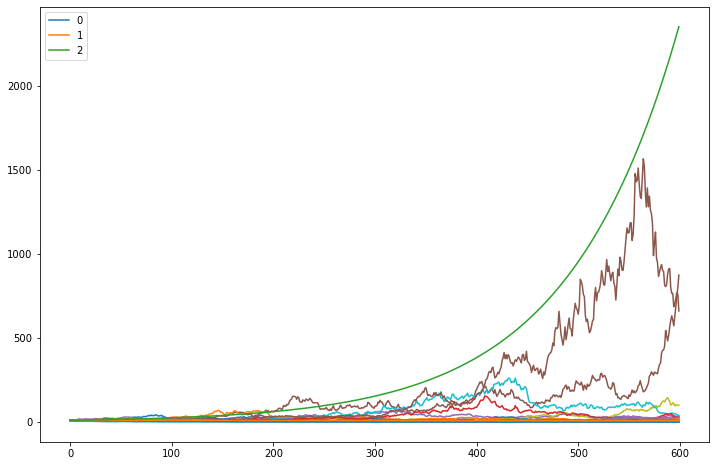

In [13]:
x3 = Weiner(initial_condition=10,generator=stats.norm, mu=0.03, kw_generator={'scale':0.26},freq_mu='A', seed=9113)

fig,ax = plt.subplots(figsize=(12,8))
df3 = x3.geometric_brownian_motion(50*12,20, freq='M')
df3.plot(ax=ax,legend=False)
df3a = x3.geometric_brownian_motion(50*12,3, freq='M',interval=0.1)
df3a.plot(ax=ax)

<AxesSubplot:>

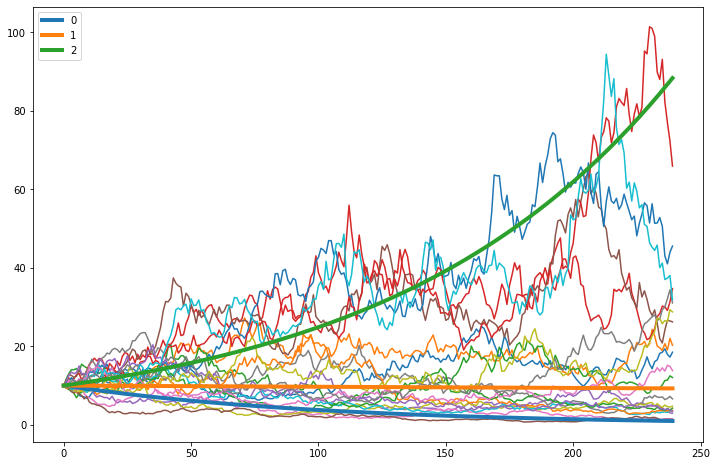

In [6]:
x4 = Weiner(initial_condition=10,generator=stats.norm, mu=0.03/12, kw_generator={'scale':np.sqrt(np.power(0.26,2)/12)},freq_mu='A', seed=9)

fig,ax = plt.subplots(figsize=(12,8))
df4 = x4.geometric_brownian_motion(20*12,20, freq='A')
df4.plot(ax=ax,legend=False)
df4a = x4.geometric_brownian_motion(20*12,3, freq='A',interval=0.1)
df4a.plot(ax=ax, linewidth=4)

<AxesSubplot:>

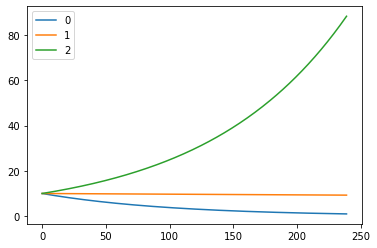

In [7]:
x4 = Weiner(initial_condition=10,generator=stats.norm, mu=0.03/12, kw_generator={'scale':np.sqrt(np.power(0.26,2)/12)},freq_mu='A', seed=9)

df4 = x4.geometric_brownian_motion(20*12,3, freq='A',interval=0.1)
df4.plot()

In [8]:
x4.weiner_confidence_interval(10,3,interval=0.66)

array([[-0.07161538, -0.07161538, -0.07161538, -0.07161538, -0.07161538,
        -0.07161538, -0.07161538, -0.07161538, -0.07161538, -0.07161538],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.07161538,  0.07161538,  0.07161538,  0.07161538,  0.07161538,
         0.07161538,  0.07161538,  0.07161538,  0.07161538,  0.07161538]])

In [9]:
interval=0.95
steps=5
processes=3
half = (1-interval)/2

min_x = half 
max_x = 1-half 

n_vector = np.linspace(min_x,max_x,processes)
print(n_vector)


[0.025 0.5   0.975]


In [10]:
testt = x.weiner_confidence_interval(10,3,0.95).reshape(-1,)
testt

array([-1.95996398, -1.95996398, -1.95996398, -1.95996398, -1.95996398,
       -1.95996398, -1.95996398, -1.95996398, -1.95996398, -1.95996398,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        1.95996398,  1.95996398,  1.95996398,  1.95996398,  1.95996398,
        1.95996398,  1.95996398,  1.95996398,  1.95996398,  1.95996398])

[-1.95996398  0.          1.95996398]


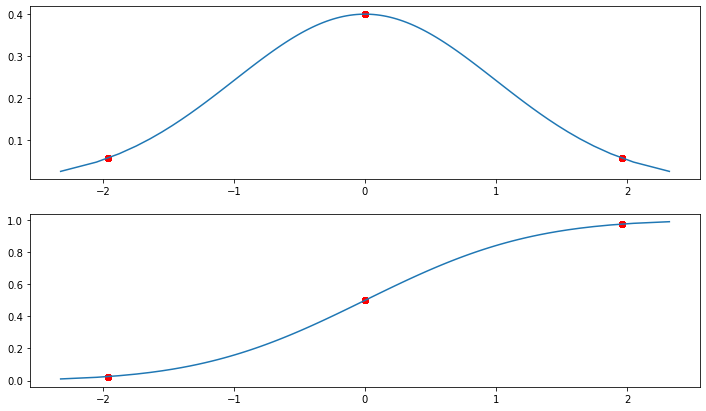

In [11]:
eps = stats.norm.ppf(n_vector)
print(eps)
pdf = stats.norm.pdf(eps)
cdf = stats.norm.cdf(eps)

pdf_test = stats.norm.pdf(testt)
cdf_test = stats.norm.cdf(testt)

prob_lin = np.linspace(0,1,100)
range_r = stats.norm.ppf(prob_lin)
pdf_r = stats.norm.pdf(range_r)
cdf_r = stats.norm.cdf(range_r)

fig,ax = plt.subplots(2,1,figsize=(12,7))
ax[0].scatter(eps,pdf)
ax[0].plot(range_r,pdf_r)
ax[0].scatter(testt,pdf_test,color='red')
ax[1].scatter(eps,cdf)
ax[1].plot(range_r,cdf_r)
ax[1].scatter(testt,cdf_test,color='red')